In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded=files.upload()
df=pd.read_csv("Heart.csv")

Saving Heart.csv to Heart.csv


In [3]:
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [4]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [5]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [6]:
df.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 33.3+ KB


In [8]:
df.duplicated().any()

False

In [9]:
df.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

**Handling Missing values**

In [10]:
df["Ca"].fillna(value=0, inplace=True)

We have some NaN values in catagorical variable to fill these  missing values can be to replace them with the most common or occurring class. We can do this by taking the index of the most common class which can be determined by using value_counts() method.


In [11]:
# filling with most common class
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [12]:
df.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

**Handling categorical variables**

Since most machine learning models only accept numerical variables, preprocessing the categorical variables becomes a necessary step. We need to convert these categorical variables to numbers such that the model is able to understand and extract valuable information.

In [13]:
tempdf=df
tempdf

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [14]:
replace_map = {'ChestPain': {'typical': 0,'nontypical': 1, 'nonanginal': 2, 'asymptomatic':3}}

In [15]:
tempdf.replace(replace_map, inplace=True)

In [16]:
replace_map = {'Thal': {'normal': 0,'fixed': 1, 'reversable': 2}}
tempdf.replace(replace_map, inplace=True)

In [17]:
replace_map = {'AHD': {'No': 0,'Yes': 1}}
tempdf.replace(replace_map, inplace=True)

In [18]:
tempdf.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,0,145,233,1,2,150,0,2.3,3,0.0,1,0
1,67,1,3,160,286,0,2,108,1,1.5,2,3.0,0,1
2,67,1,3,120,229,0,2,129,1,2.6,2,2.0,2,1
3,37,1,2,130,250,0,0,187,0,3.5,3,0.0,0,0
4,41,0,1,130,204,0,2,172,0,1.4,1,0.0,0,0


**Data Visualization**

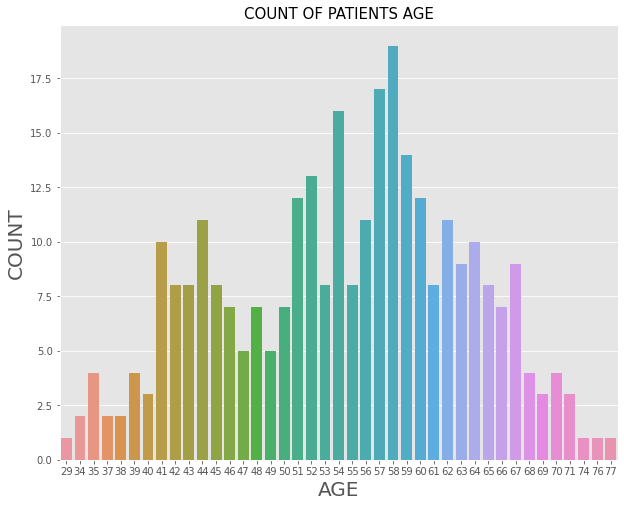

In [19]:
import seaborn as sns
plt.figure(figsize=(10,8))
plt.style.use("ggplot")
sns.countplot(x=tempdf["Age"])    #using countplot
plt.title("COUNT OF PATIENTS AGE",fontsize=15)
plt.xlabel("AGE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


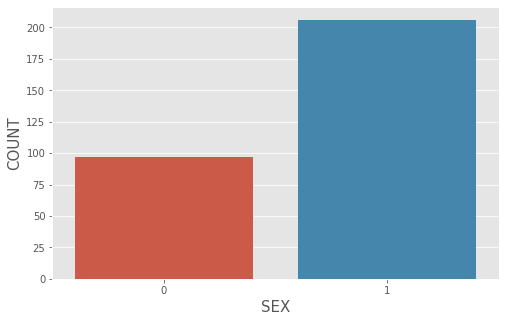

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(tempdf["Sex"])
plt.xlabel("SEX",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.show()

From this We know that number of male is more than number of female(male=1,female=0)

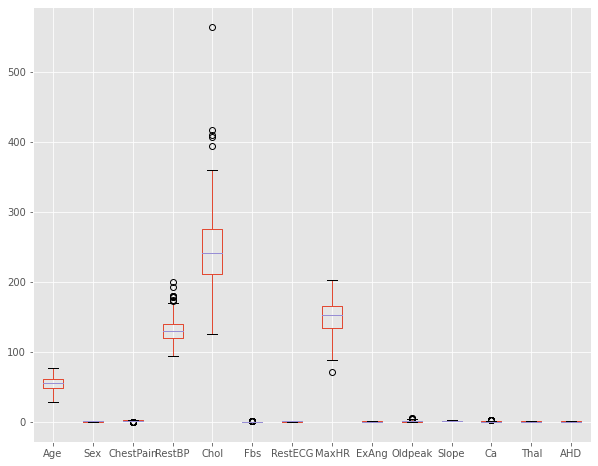

In [21]:
fig, ax = plt.subplots(figsize=(10,8))
tempdf.boxplot(ax=ax)

There are some outliers but i have decided to keep them because logically i think they are the reason behind the heart attack.
May be I'll handle outliers later.

In [ ]:
'''fig,axs=plt.subplots(nrows=7,figsize=(5,10))
for i in range(0,7):
  sns.boxplot(x=tempdf.iloc[:,i],ax=axs[i]);
plt.tight_layout()
'''

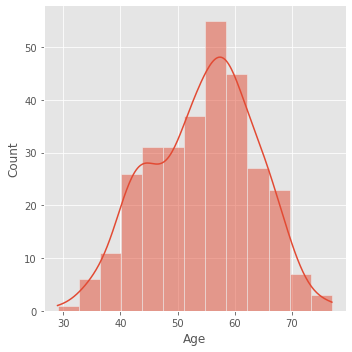

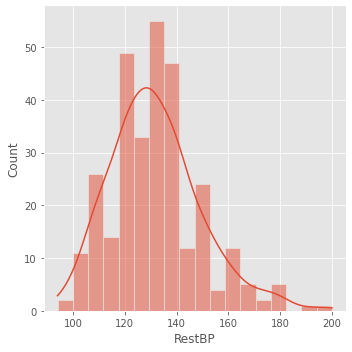

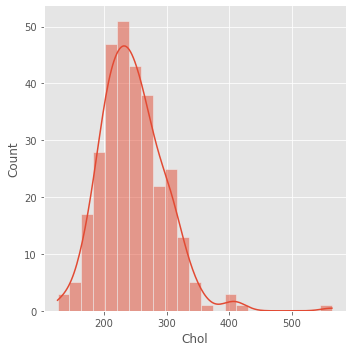

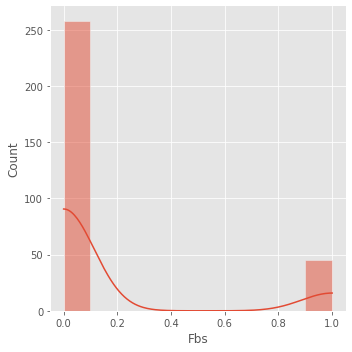

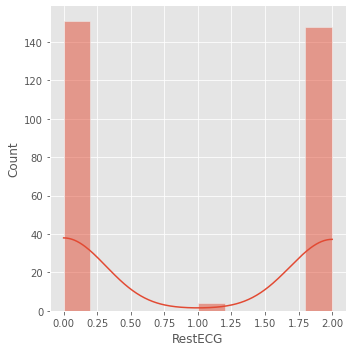

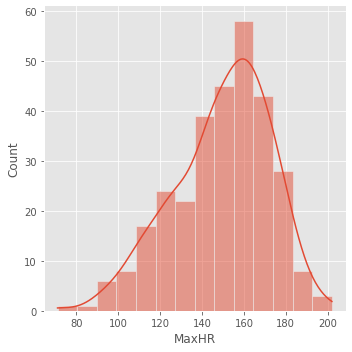

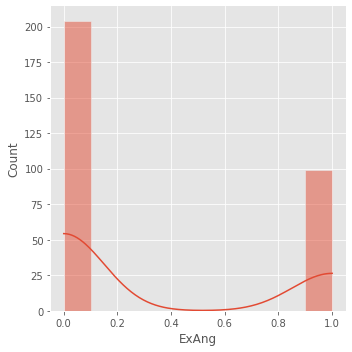

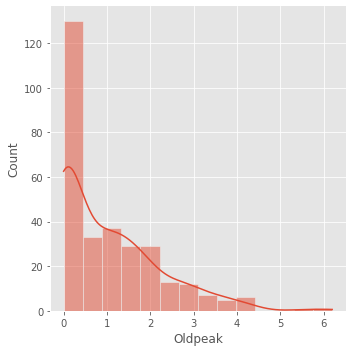

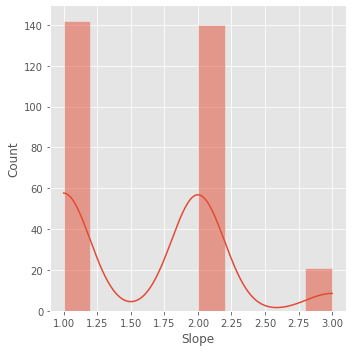

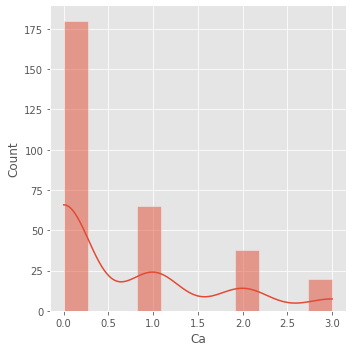

In [23]:
columns=['Age','RestBP',	'Chol','Fbs', 'RestECG','MaxHR','ExAng', 'Oldpeak','Slope',	'Ca']
for col in columns:
  sns.displot(tempdf[col],kde=True)

**Feature Scaling**

In [24]:
tempdf.describe()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,0.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,2.000000,1.000000


We have to scale our data as difference between the mean of some features is too high.

Standardization can be helpful in cases where the data follows a Gaussian distribution(Normal distribution/bell curve). Our most of the data follows the gausian distribution.  However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.
 so here I'm using both Standardization and Normalization for feature scaling. And at last I'll compare both of them and keep that method which one will give better result.

In [25]:
# data standardization with sklearn
from sklearn.preprocessing import StandardScaler
data=tempdf.copy()
cols=['Age',	'Sex',	'ChestPain',	'RestBP',	'Chol',	'Fbs',	'RestECG',	'MaxHR',	'ExAng',	'Oldpeak',	'Slope',	'Ca',	'Thal']
for i in cols:
  scale=StandardScaler().fit(data[[i]]);
  data[i]=scale.transform(data[[i]])


  '''# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
data=tempdf.copy()
cols=['Age',	'Sex',	'ChestPain',	'RestBP',	'Chol',	'Fbs',	'RestECG',	'MaxHR',	'ExAng',	'Oldpeak',	'Slope',	'Ca',	'Thal']
for i in cols:
  scale=MinMaxScaler().fit(data[[i]]);
  data[i]=scale.transform(data[[i]])
  '''

LogisticRegression is not for regression but classification !

The Y variable must be the classification class,

(for example 0 or 1)

And not a continuous variable,

that would be a regression problem
so we do not need to scale out Y(outcome) variable as it is ony 0 and 1

In [26]:
data.describe()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,303.000000
mean,-1.538923e-17,2.931282e-18,-1.713884e-16,4.259519e-16,2.418308e-16,-1.135872e-17,6.954466e-16,-1.179841e-16,-4.470205e-17,-1.700144e-16,2.334033e-16,-1.176177e-16,1.487626e-16,0.458746
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,0.499120
min,-2.819115e+00,-1.457296e+00,-2.251775e+00,-2.145037e+00,-2.334877e+00,-4.176345e-01,-9.967493e-01,-3.442067e+00,-6.966305e-01,-8.968617e-01,-9.763521e-01,-7.111314e-01,-8.707586e-01,0.000000
25%,-7.135564e-01,-1.457296e+00,-1.652679e-01,-6.652997e-01,-6.905030e-01,-4.176345e-01,-9.967493e-01,-7.053073e-01,-6.966305e-01,-8.968617e-01,-9.763521e-01,-7.111314e-01,-8.707586e-01,0.000000
50%,1.729945e-01,6.862024e-01,-1.652679e-01,-9.616980e-02,-1.101357e-01,-4.176345e-01,9.967493e-03,1.485618e-01,-6.966305e-01,-2.067053e-01,6.491132e-01,-7.111314e-01,-8.707586e-01,0.000000
75%,7.270888e-01,6.862024e-01,8.779855e-01,4.729601e-01,5.476139e-01,-4.176345e-01,1.016684e+00,7.178079e-01,1.435481e+00,4.834512e-01,6.491132e-01,3.608726e-01,1.223208e+00,1.000000
max,2.500191e+00,6.862024e-01,8.779855e-01,3.887739e+00,6.138485e+00,2.394438e+00,1.016684e+00,2.294182e+00,1.435481e+00,4.451851e+00,2.274579e+00,2.504881e+00,1.223208e+00,1.000000


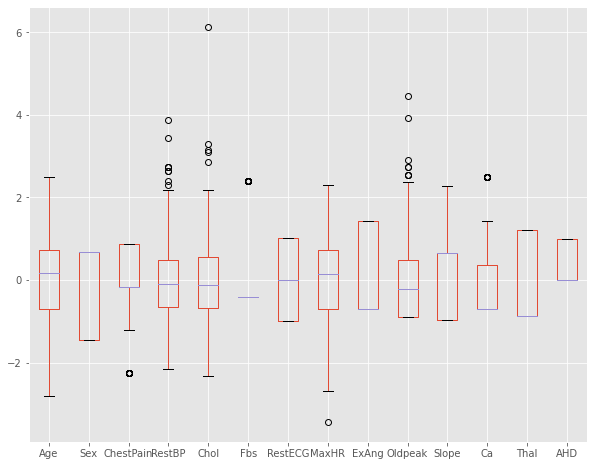

In [27]:
fig, ax = plt.subplots(figsize=(10,8))
data.boxplot(ax=ax)

There are some outliers but i have decided to keep them because logically i think they are the reason behind the heart attack.

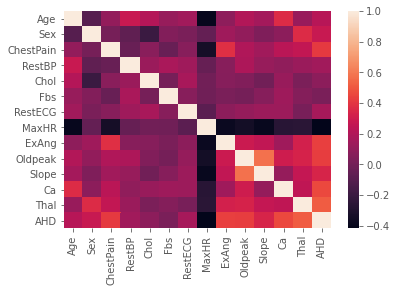

In [28]:
corr=data.corr()
sns.heatmap(corr)

In [29]:
correlation=data.corr()
correlation

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
Age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.365323,0.122300,0.223120
Sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.086048,0.367911,0.276816
ChestPain,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233117,0.259835,0.414446
RestBP,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.097528,0.126879,0.150825
Chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.123726,0.030438,0.085164
Fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.140764,0.054164,0.025264
RestECG,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.131749,0.019115,0.169202
MaxHR,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.265699,-0.257980,-0.417167
ExAng,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145788,0.321680,0.431894
Oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.301067,0.333925,0.424510


Independent variables are not highly correlated with each other. 

**Model Building**

In [30]:
x=data.iloc[:,0:13]
y=data['AHD']

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True)
lr=LogisticRegression()
lr=lr.fit(x_train,y_train)

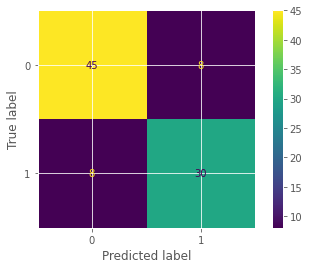

In [33]:
from sklearn.metrics import plot_confusion_matrix;
plot_confusion_matrix(lr,x_test,y_test)

 accuracy= ((TP+TN)/(TP+FP+TN+FN))

In [35]:
acc=((45+30)/(45+8+30+8))     #acc=0.8241758241758241 when we use standardization
#acc=((45+29)/(45+9+29+8))     #acc=0.8031868131868132 when we use normalization
acc

0.8241758241758241

In [34]:
from sklearn.metrics import classification_report;
y_pred=lr.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        53
           1       0.79      0.79      0.79        38

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



In [47]:
tempdata=[0.848726,	0.986202,	-1.251775,	0.457525,	-0.364900,	2.994438,	1.916684,	0.017197,	-0.696631,	1.087338,	2.274579,	-0.711131,	0.676225]   
#tempdata=data.iloc[4,0:13]
tempdata=np.array(tempdata).reshape(1,-1)   
pred=lr.predict(tempdata)
pred

array([1])

Here I'm giving some random value of all the features to my regression model and it is giving me the best outcome.